# Tracebacks 

using `Galpy`, `Plotly`and co.

In [ ]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014

import matplotlib.pyplot as plt


In [2]:
r0 =8.122 
v0=236.
z0=0.0208

In [3]:
def trans_xyz(icrs_c, frame):
    return icrs_c.transform_to(frame).cartesian.xyz.to(u.pc)
def trans_vxyz(icrs_c, frame):
    return icrs_c.transform_to(frame).cartesian.differentials['s'].d_xyz.to(u.km/u.s)

def ref_coords(time, ref_center_coords = [0, 0, 0, - 11.1, - 12.24, - 7.25]):
    ref_sc = SkyCoord(
        u = ref_center_coords[0] * u.pc, 
        v = ref_center_coords[1] * u.pc,
        w = ref_center_coords[2] * u.pc,
        U = ref_center_coords[3] * u.km/u.s,
        V = ref_center_coords[4] * u.km/u.s,
        W = ref_center_coords[5] * u.km/u.s,
        frame = 'galactic',
        representation_type = 'cartesian',
        differential_type = 'cartesian'
    )

    ref_orbit = Orbit(vxvv = ref_sc, ro = r0, vo = v0, zo = z0, solarmotion = 'schoenrich')
    ref_orbit.integrate(time, MWPotential2014)
    ref_icrs = ref_orbit.SkyCoord(time)
    ref_gal = ref_icrs.transform_to('galactic').represent_as('cartesian')
    ref_lsr = ref_icrs.transform_to('galacticlsr').represent_as('cartesian')

    xyz_gal, vxyz_gal = trans_xyz(ref_icrs, 'galactic'), trans_vxyz(ref_icrs, 'galactic')
    xyz_lsr, vxyz_lsr = trans_xyz(ref_icrs, 'galacticlsr'), trans_vxyz(ref_icrs, 'galacticlsr')

    x_gal, y_gal, z_gal = xyz_gal[0], xyz_gal[1], xyz_gal[2]
    vx_gal, vy_gal, vz_gal = vxyz_gal[0], vxyz_gal[1], vxyz_gal[2]

    x_lsr, y_lsr, z_lsr = xyz_lsr[0], xyz_lsr[1], xyz_lsr[2]
    vx_lsr, vy_lsr, vz_lsr = vxyz_lsr[0], vxyz_lsr[1], vxyz_lsr[2]

    ref_gal = [x_gal, y_gal, z_gal, vx_gal, vy_gal, vz_gal]
    ref_lsr = [x_lsr, y_lsr, z_lsr, vx_lsr, vy_lsr, vz_lsr]

    return ref_gal, ref_lsr

In [15]:
def orbit_coords(time, coords, show_plot = False):
    x, y, z, vx, vy, vz = coords
    ref_sc = SkyCoord(
        x = x * u.pc, 
        y = y * u.pc,
        z = z * u.pc,
        v_x = vx * u.km/u.s,
        v_y = vy * u.km/u.s,
        v_z = vz * u.km/u.s,
        frame = 'galacticlsr',
        representation_type = 'cartesian',
        differential_type = 'cartesian'
    )

    orbit = Orbit(vxvv = ref_sc, ro = r0, vo = v0, zo = z0, solarmotion = 'schoenrich')
    orbit.integrate(time, MWPotential2014)
    icrs = orbit.SkyCoord(time)

    ref_gal, ref_lsr = ref_coords(time)

    xyz_gal, vxyz_gal = trans_xyz(icrs, 'galactic'), trans_vxyz(icrs, 'galactic')
    xyz_lsr, vxyz_lsr = trans_xyz(icrs, 'galacticlsr'), trans_vxyz(icrs, 'galacticlsr')

    x_gal, y_gal, z_gal = xyz_gal[0], xyz_gal[1], xyz_gal[2]
    vx_gal, vy_gal, vz_gal = vxyz_gal[0], vxyz_gal[1], vxyz_gal[2]

    x_lsr, y_lsr, z_lsr = xyz_lsr[0], xyz_lsr[1], xyz_lsr[2]
    vx_lsr, vy_lsr, vz_lsr = vxyz_lsr[0], vxyz_lsr[1], vxyz_lsr[2]

    x_cor = x_gal - ref_gal[0]
    y_cor = y_gal - ref_gal[1]
    z_cor = z_gal - ref_gal[2]

    vx_cor = vx_gal - ref_gal[3]
    vy_cor = vy_gal - ref_gal[4]
    vz_cor = vz_gal - ref_gal[5]


    gal = [x_gal, y_gal, z_gal, vx_gal, vy_gal, vz_gal]
    lsr = [x_lsr, y_lsr, z_lsr, vx_lsr, vy_lsr, vz_lsr]
    cor = [x_cor, y_cor, z_cor, vx_cor, vy_cor, vz_cor]

    if show_plot:
        fig, axs = plt.subplots(2, 3, figsize=(9, 3))

        ax1, ax2, ax3, ax11, ax12, ax13 = axs.flatten()

        ax1.scatter(time, x_gal, label = f'x {x_gal[0]:.2f}')
        ax1.scatter(time, y_gal, label = f'y {y_gal[0]:.2f}')
        ax1.scatter(time, z_gal, label = f'z {z_gal[0]:.2f}')

        ax11.scatter(time, vx_gal, label = f'vx {vx_gal[0]:.2f}')
        ax11.scatter(time, vy_gal, label = f'vy {vy_gal[0]:.2f}')
        ax11.scatter(time, vz_gal, label = f'vz {vz_gal[0]:.2f}')

        ax2.scatter(time, x_lsr, label = f'x {x_lsr[0]:.2f}')
        ax2.scatter(time, y_lsr, label = f'y {y_lsr[0]:.2f}')
        ax2.scatter(time, z_lsr, label = f'z {z_lsr[0]:.2f}')

        ax12.scatter(time, vx_lsr, label = f'vx {vx_lsr[0]:.2f}')
        ax12.scatter(time, vy_lsr, label = f'vy {vy_lsr[0]:.2f}')
        ax12.scatter(time, vz_lsr, label = f'vz {vz_lsr[0]:.2f}')

        ax3.scatter(time, x_cor, label = f'x {x_cor[0]:.2f}')
        ax3.scatter(time, y_cor, label = f'y {y_cor[0]:.2f}')
        ax3.scatter(time, z_cor, label = f'z {z_cor[0]:.2f}')

        ax13.scatter(time, vx_cor, label = f'vx {vx_cor[0]:.2f}')
        ax13.scatter(time, vy_cor, label = f'vy {vy_cor[0]:.2f}')
        ax13.scatter(time, vz_cor, label = f'vz {vz_cor[0]:.2f}')

        fontsize = 6
        ax1.set_title('Galactic'), ax2.set_title('LSR'), ax3.set_title('Corotating LSR')
        ax1.legend(fontsize = fontsize), ax2.legend(fontsize = fontsize), ax11.legend(fontsize = fontsize),
        ax12.legend(fontsize = fontsize), ax3.legend(fontsize = fontsize), ax13.legend(fontsize = fontsize)

    return gal, lsr, cor

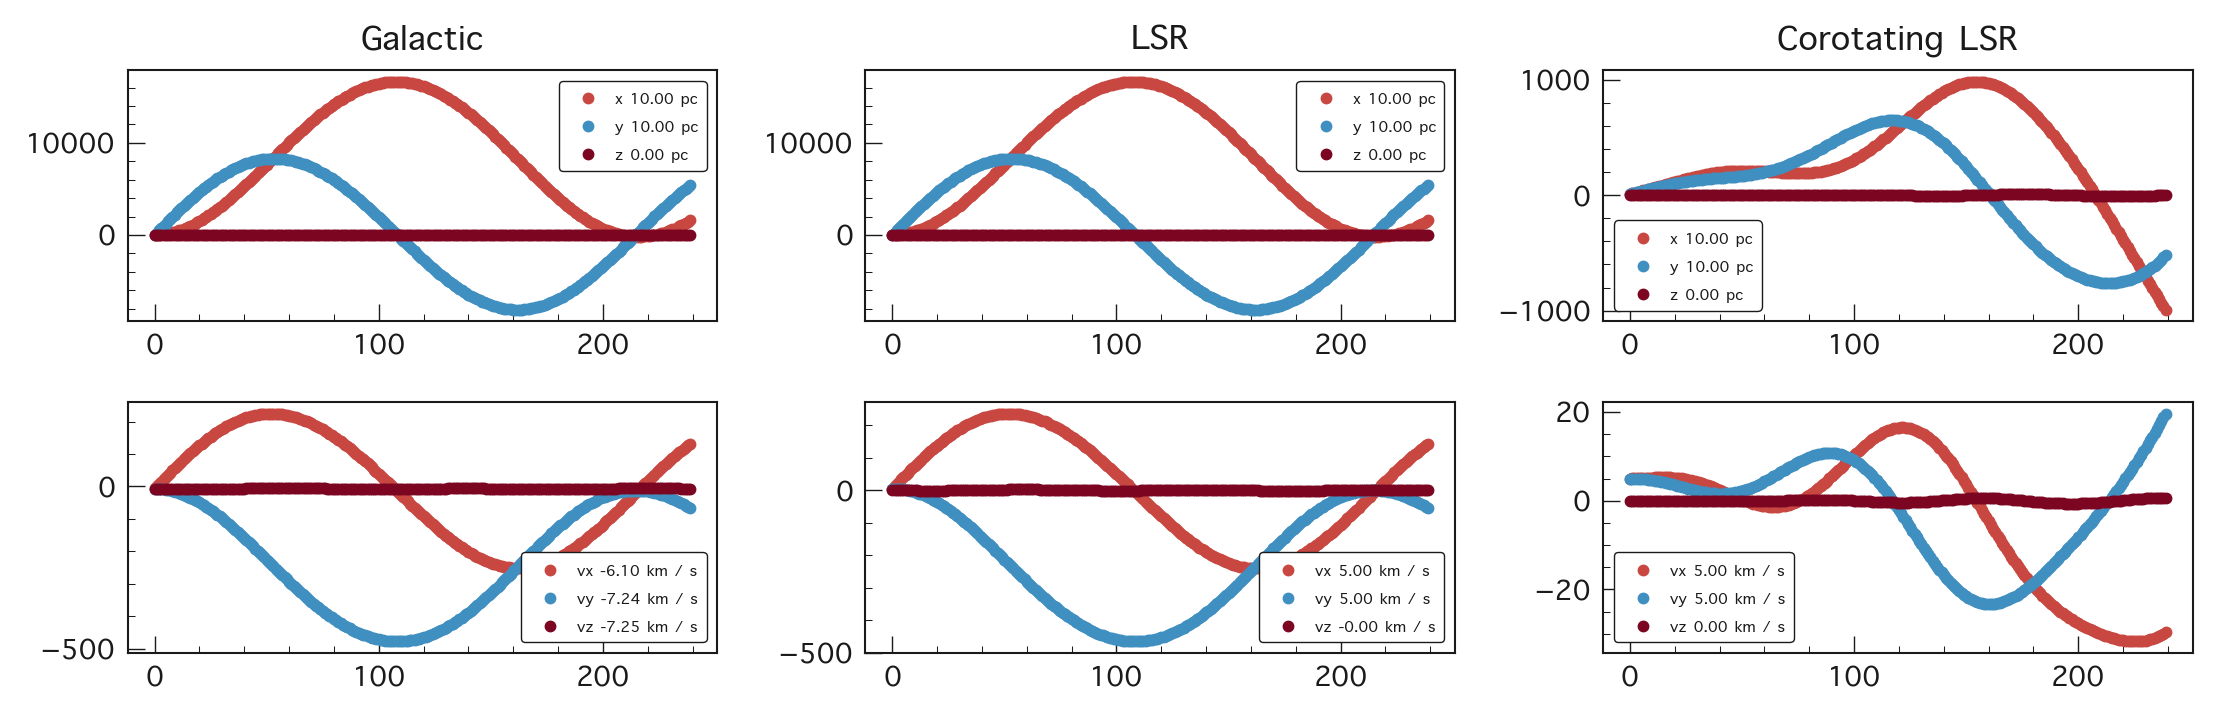

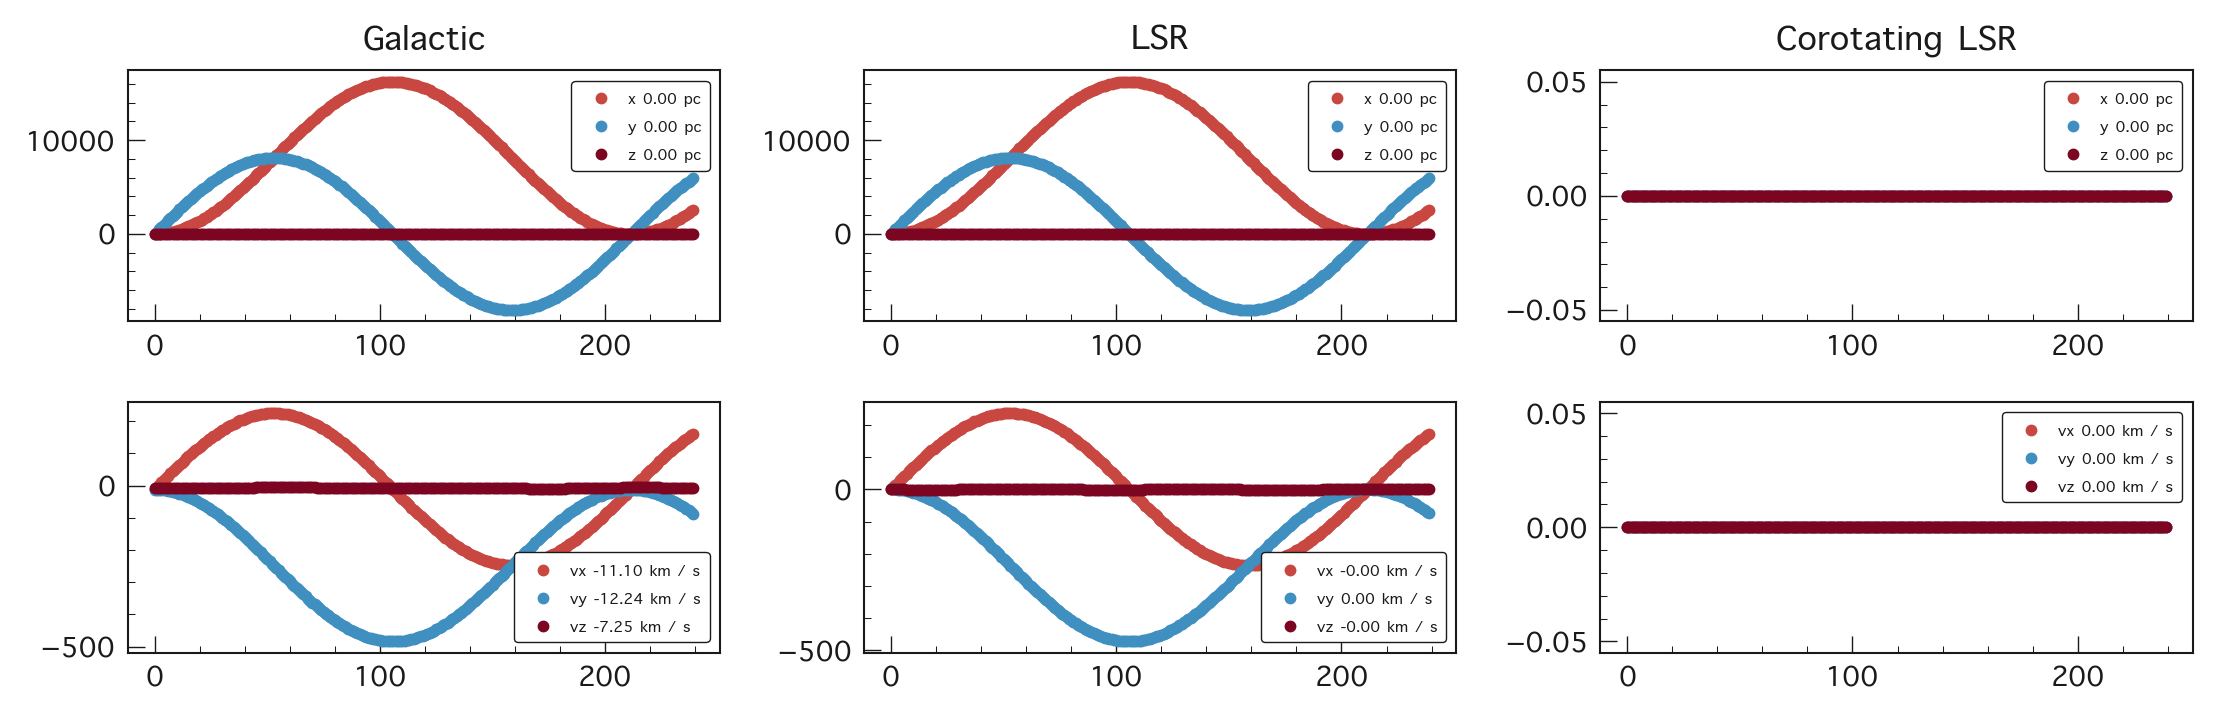

In [16]:
time = np.arange(0, 240, 1.)
c1 = [10, 10, 0, 5, 5, 0]
c2 = [0, 0, 0, 0, 0, 0] # in LSR

_, _, _ = orbit_coords(time*u. Myr, c1, show_plot=True)

_, _, _ = orbit_coords(time*u. Myr, c2, show_plot=True)

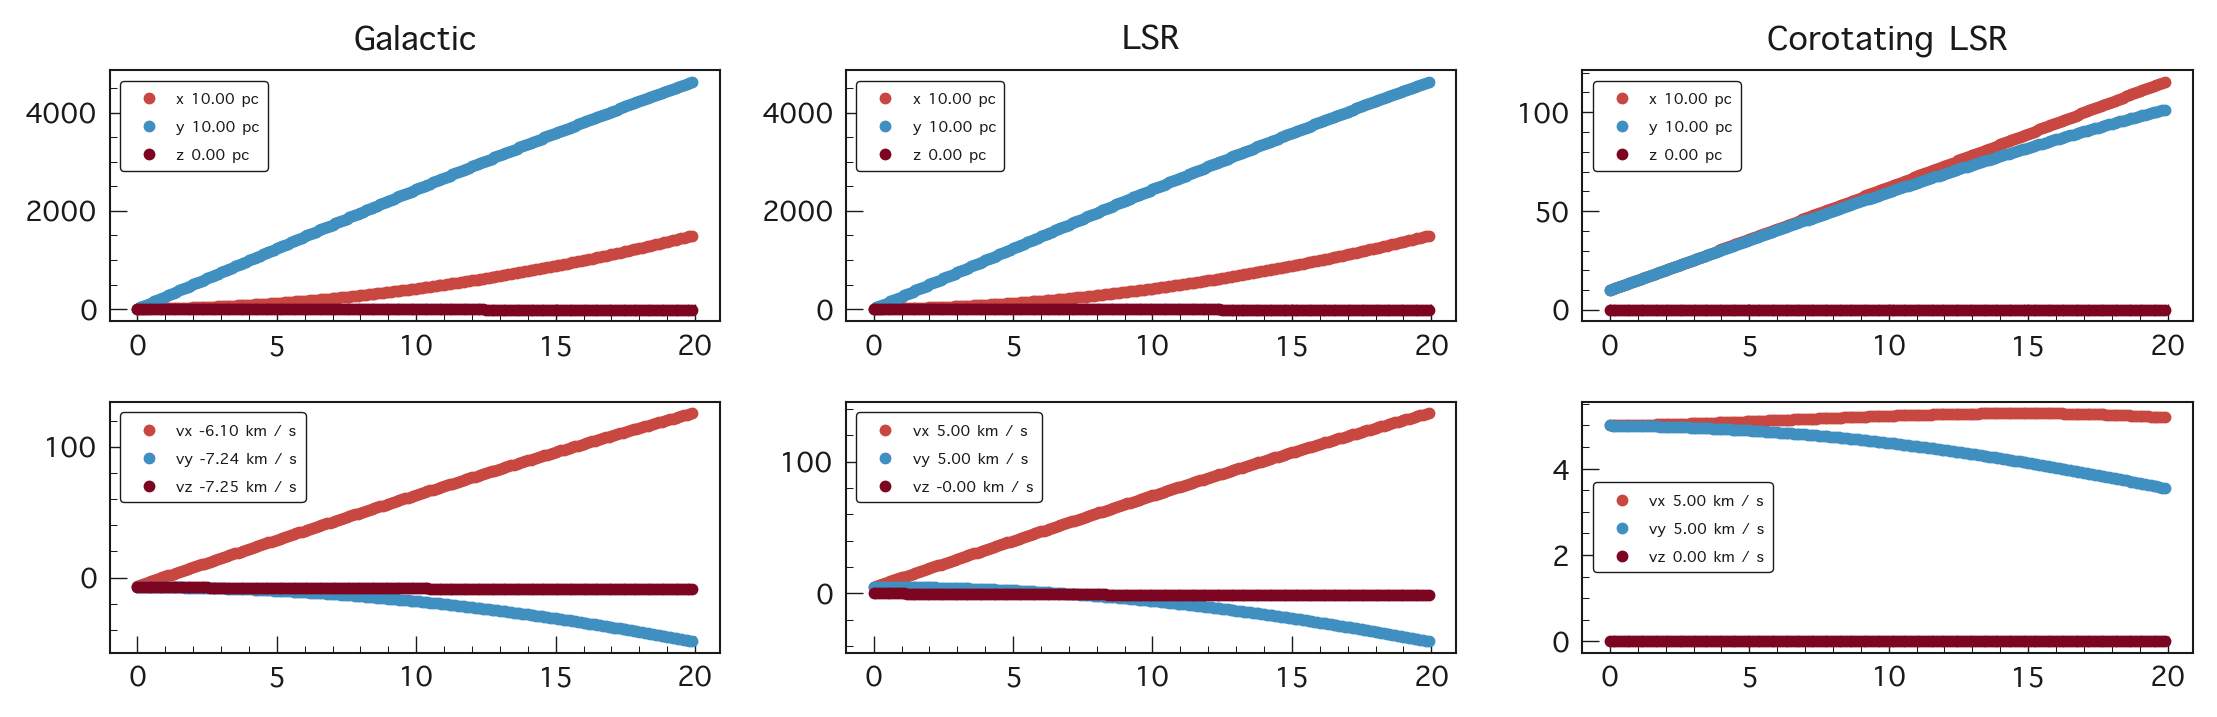

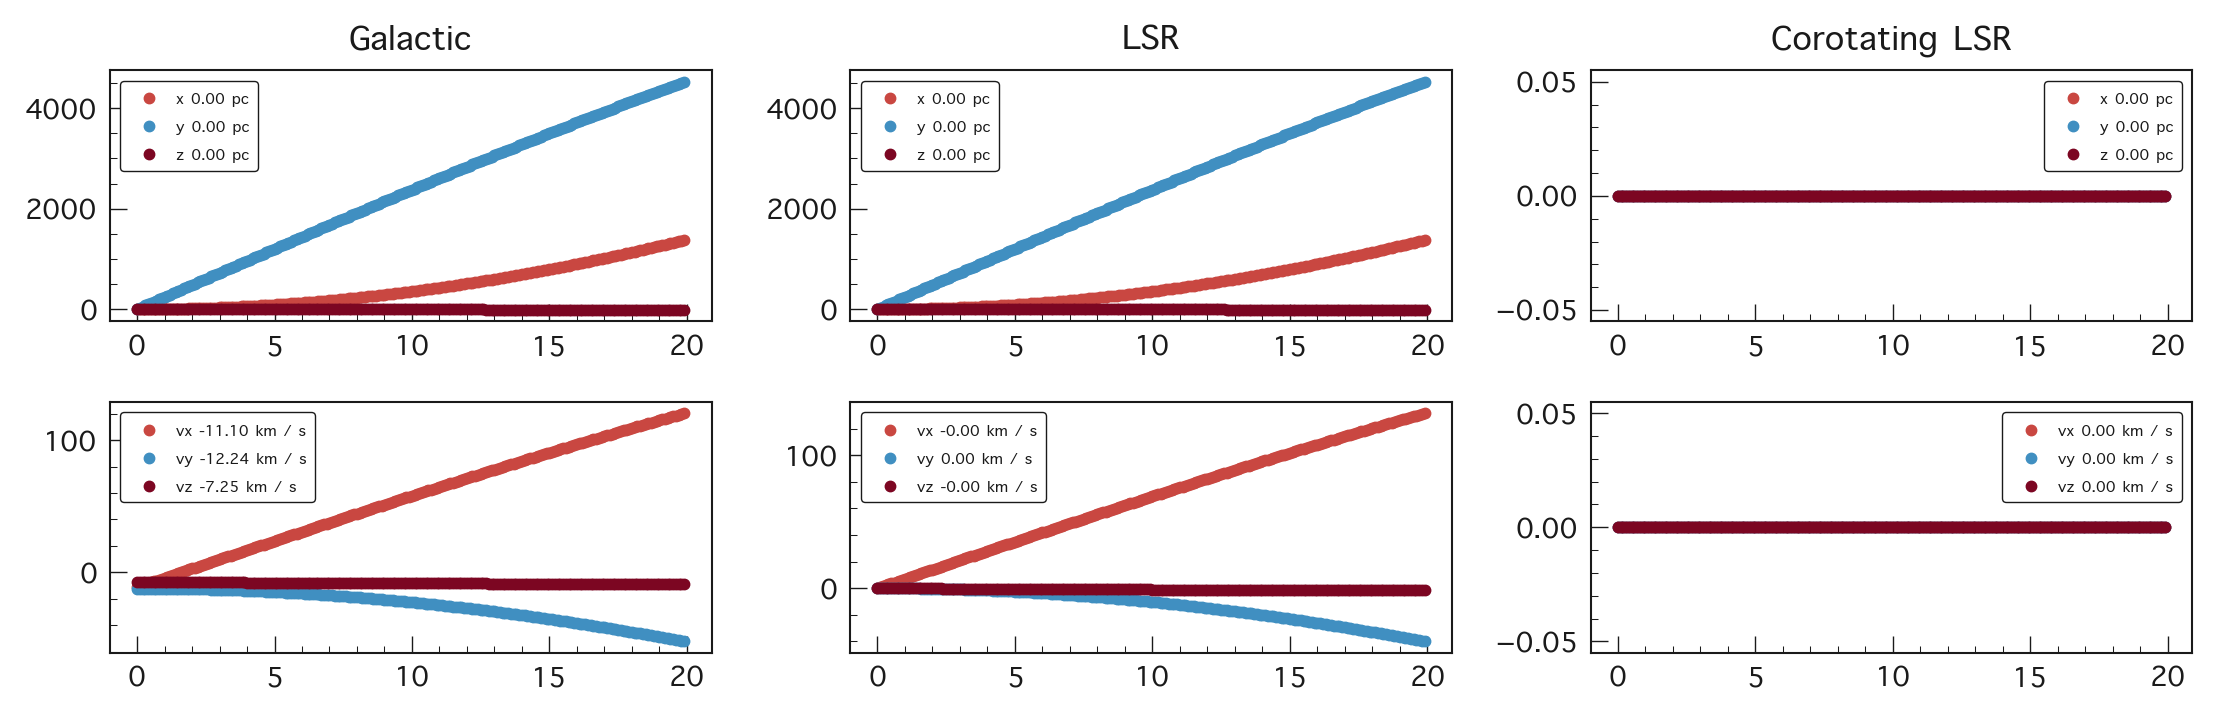

In [17]:
time = np.arange(0, 20, .1)
c1 = [10, 10, 0, 5, 5, 0]
c2 = [0, 0, 0, 0, 0, 0] # in LSR

_, _, _ = orbit_coords(time*u. Myr, c1, show_plot=True)

_, _, _ = orbit_coords(time*u. Myr, c2, show_plot=True)